## Data Preprocessing

Importing the Libraries

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Importing the Training set

In [2]:
dataset_train = pd.read_csv('Dataset/Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:,1:2].values
print(training_set)

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]


Feature Scaling

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)
print(training_set_scaled)

[[0.08581368]
 [0.09701243]
 [0.09433366]
 ...
 [0.95725128]
 [0.93796041]
 [0.93688146]]


#### Creating a data strucuture with 60 timestamps and 1 output

(At each time T Rnn is going to look at the 60 stock prices before time T)

In [4]:
X_train = []
y_train = []

for i in range(60,1258):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)
print(X_train)
print(y_train)

[[0.08581368 0.09701243 0.09433366 ... 0.07846566 0.08034452 0.08497656]
 [0.09701243 0.09433366 0.09156187 ... 0.08034452 0.08497656 0.08627874]
 [0.09433366 0.09156187 0.07984225 ... 0.08497656 0.08627874 0.08471612]
 ...
 [0.92106928 0.92438053 0.93048218 ... 0.95475854 0.95204256 0.95163331]
 [0.92438053 0.93048218 0.9299055  ... 0.95204256 0.95163331 0.95725128]
 [0.93048218 0.9299055  0.93113327 ... 0.95163331 0.95725128 0.93796041]]
[0.08627874 0.08471612 0.07454052 ... 0.95725128 0.93796041 0.93688146]


Reshaping

In [5]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

## Building the RNN

Importing keras libraries and packages

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout


Initialaising the RNN

In [7]:
regressor = Sequential()


Adding the first LSTM layer and some Dropout regularization

In [8]:
regressor.add(LSTM(units=50,return_sequences=True,input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

c:\Users\saza\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Adding the second LSTM layer and some Dropout regularization

In [9]:
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

Adding the third LSTM layer and some Dropout regularization

In [10]:
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

Adding the fourth LSTM layer and some Dropout regularization

In [11]:
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

Adding the Output Layer

In [12]:
regressor.add(Dense(units=1))

Compiling the RNN

In [13]:
regressor.compile(optimizer='adam',loss='mean_squared_error')

Fitting the RNN to the Training set

In [14]:
regressor.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - loss: 0.0849
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0073
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0058
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0059
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0051
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0057
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0051
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0046
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0048
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0041
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0041
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0041
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0046
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0037
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - lo

### Making the predictions and visualising the results

Getting real stock price of 2017

In [24]:
dataset_test = pd.read_csv('Dataset/Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:,1:2].values
print(real_stock_price)

[[778.81]
 [788.36]
 [786.08]
 [795.26]
 [806.4 ]
 [807.86]
 [805.  ]
 [807.14]
 [807.48]
 [807.08]
 [805.81]
 [805.12]
 [806.91]
 [807.25]
 [822.3 ]
 [829.62]
 [837.81]
 [834.71]
 [814.66]
 [796.86]]


Getting the predicted stock price of 2017

In [25]:
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)
inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test = []

for i in range(60,80):
    X_test.append(inputs[i-60:i,0])

X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
print(X_test)

[[[0.9299055 ]
  [0.93113327]
  [0.92750577]
  ...
  [0.95725128]
  [0.93796041]
  [0.93688146]]

 [[0.93113327]
  [0.92750577]
  [0.94415507]
  ...
  [0.93796041]
  [0.93688146]
  [0.92955205]]

 [[0.92750577]
  [0.94415507]
  [0.93876032]
  ...
  [0.93688146]
  [0.92955205]
  [0.94731751]]

 ...

 [[0.96054394]
  [0.9371419 ]
  [0.92841729]
  ...
  [1.01045465]
  [1.02407173]
  [1.03930724]]

 [[0.9371419 ]
  [0.92841729]
  [0.90804747]
  ...
  [1.02407173]
  [1.03930724]
  [1.03354044]]

 [[0.92841729]
  [0.90804747]
  [0.8771858 ]
  ...
  [1.03930724]
  [1.03354044]
  [0.99624228]]]


In [26]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
print(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[[792.3196 ]
 [789.4114 ]
 [789.7908 ]
 [791.1645 ]
 [794.48334]
 [800.3547 ]
 [805.4373 ]
 [807.10535]
 [807.1052 ]
 [806.7685 ]
 [806.60266]
 [806.5136 ]
 [806.5631 ]
 [807.3807 ]
 [808.56433]
 [813.5969 ]
 [820.7034 ]
 [828.0031 ]
 [831.5168 ]
 [826.54865]]


Visualising the result

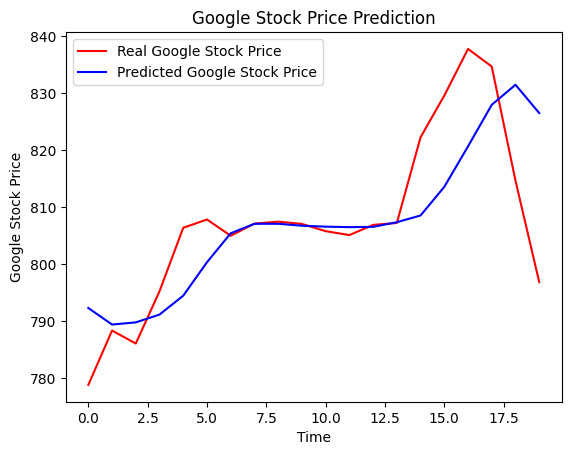

In [27]:
plt.plot(real_stock_price,color='red',label = 'Real Google Stock Price')
plt.plot(predicted_stock_price,color='blue',label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()